In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
import multiprocessing as mp
import time
import glob
import re
import random
from sklearn.model_selection import train_test_split
import torch

sys.path.insert(0, '/Data/user/panhailin/code/git_lab/npspy')
import npspy as nps
from npspy import npsc

In [27]:
metrics_dfs = []
tasks = ['c02', 'c03', 'c04', 'c05', 'c06', 'c07', 'c08', 'c09', 'c10', 'c11', 'c12', 'c15', 'c16', 'c17', 'c18',]

for task in tasks:
    print(f'===={task}====')
    pred_proba_df = pd.read_csv(f"../../../03.results/classification_on_clean_data/GSXGS/diff_task/clean/clean_data_{task}_pred_proba.csv", index_col=0)
    metrics_df = npsc.get_metrics_from_pred_proba_df(pred_proba_df)
    metrics_df.index = [f'clean_{task}']
    metrics_dfs.append(metrics_df)

for task in tasks:
    pred_proba_df = pd.read_csv(f"../../../03.results/classification_on_clean_data/GSXGS/diff_task/valid/valid_data_{task}_pred_proba.csv", index_col=0)
    metrics_df = npsc.get_metrics_from_pred_proba_df(pred_proba_df)
    metrics_df.index = [f'valid_{task}']
    metrics_dfs.append(metrics_df)

metrics_df = pd.concat(metrics_dfs)
metrics_df

====c02====
====c03====
====c04====
====c05====
====c06====
====c07====
====c08====
====c09====
====c10====
====c11====
====c12====
====c15====
====c16====
====c17====
====c18====


,accuracy,precision,recall,f1_score,jaccard_score
clean_c02,0.957833,0.957848,0.957833,0.957833,0.919078
clean_c03,0.757333,0.756347,0.757333,0.756758,0.612502
clean_c04,0.794333,0.795078,0.794333,0.794342,0.663015
clean_c05,0.910556,0.910745,0.910556,0.910638,0.836891
clean_c06,0.756800,0.758192,0.756800,0.757148,0.633083
clean_c07,0.819833,0.821376,0.819833,0.820218,0.703909
clean_c08,0.719167,0.724143,0.719167,0.717599,0.559995
clean_c09,0.801833,0.804862,0.801833,0.801340,0.668644
clean_c10,0.845667,0.845672,0.845667,0.845666,0.732601
clean_c11,0.786833,0.787172,0.786833,0.786770,0.648508


In [28]:
all_task_dict = {
    'c02': ['1S', '1pS'],
    'c03': ['1S', '1SMe', '3SMe'],
    'c04': ['1S', '1SAc', '3SAc'],
    'c05': ['1S', '1Soct', '3Soct'],
    'c06': ['1S', '1pS', '1SMe', '1SAc', '1Soct'],
    'c07': ['1S', '3SMe', '3SAc', '3Soct'],
    'c08': ['1I', '1L'],
    'c09': ['3I', '3L'],
    'c10': ['3dI', '3dL'],
    'c11': ['3I', '3dI'],
    'c12': ['3L', '3dL'],
    'c15': ['1D', '1D02'],
    'c16': ['1R', '1R02'],
    'c17': ['1Y', '1Y02'],
    'c18': ['1W', '1W02'],
}

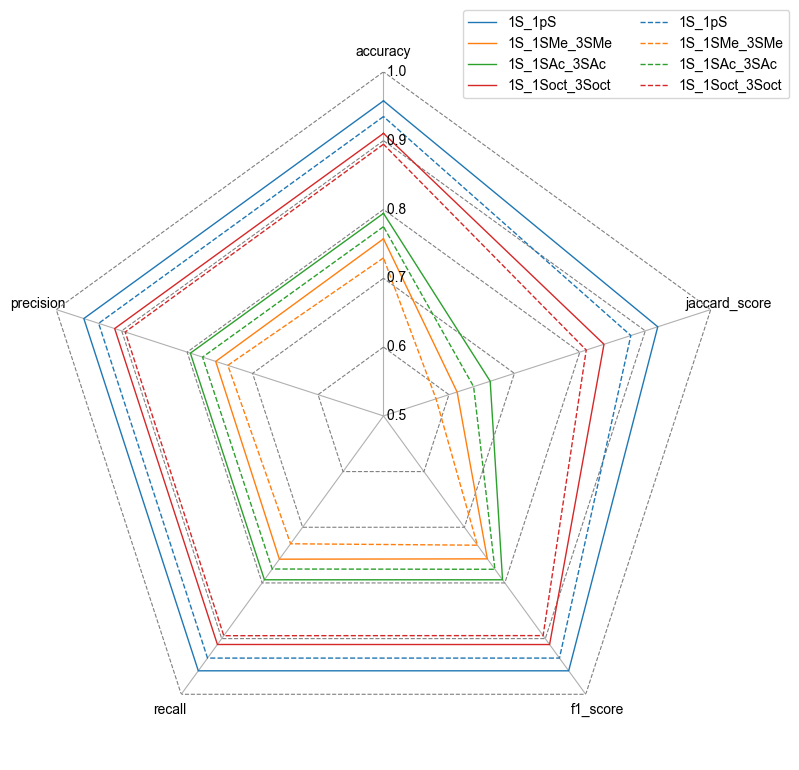

In [29]:
tmp_df = metrics_df.iloc[[np.isin(re.search(r'_(c\d+)', i).group(1), ['c02', 'c03', 'c04', 'c05',]) for i in metrics_df.index]]
tmp_df.index = ["_".join(all_task_dict[re.search(r'_(\S+)', i).group(1)]) for i in tmp_df.index]
npsc.draw_radar_plot(
    tmp_df,
    colors=["tab:blue", 'tab:orange', 'tab:green', 'tab:red']*2,
    linestyles=['solid'] * 4 + ['dashed'] * 4,
    marker=None,
    y_min=0.5,
)
plt.savefig("../../../05.figures/classification/GSXGS/chemical_modification_rada_plot.pdf", bbox_inches='tight')

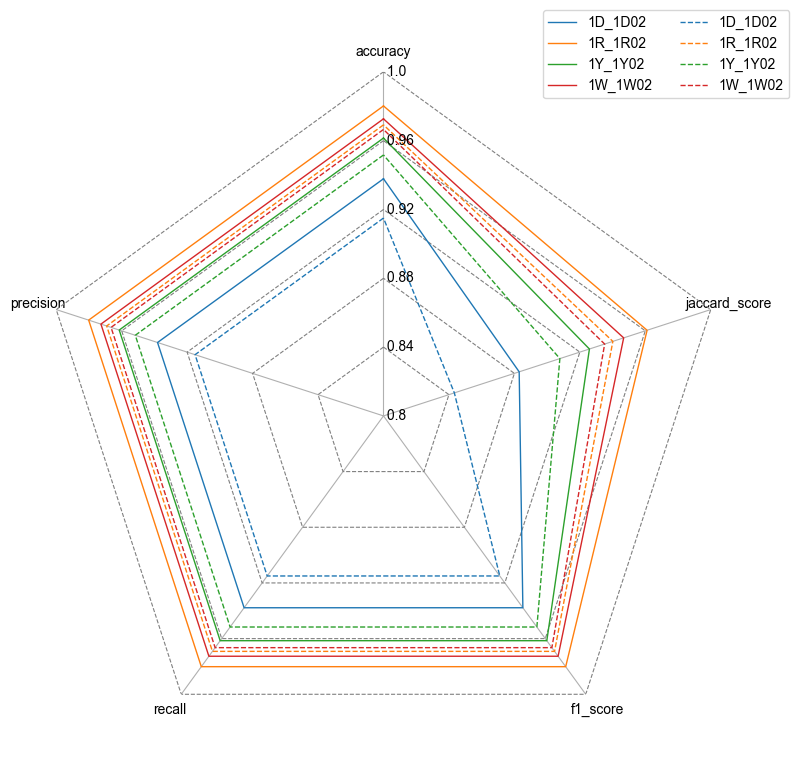

In [30]:
tmp_df = metrics_df.iloc[[np.isin(re.search(r'_(c\d+)', i).group(1), ['c15', 'c16', 'c17', 'c18',]) for i in metrics_df.index]]
tmp_df.index = ["_".join(all_task_dict[re.search(r'_(\S+)', i).group(1)]) for i in tmp_df.index]
npsc.draw_radar_plot(
    tmp_df,
    colors=["tab:blue", 'tab:orange', 'tab:green', 'tab:red']*2,
    linestyles=['solid'] * 4 + ['dashed'] * 4,
    marker=None,
    y_min=0.8,
)
plt.savefig("../../../05.figures/classification/GSXGS/amino_acid_position_rada_plot.pdf", bbox_inches='tight')

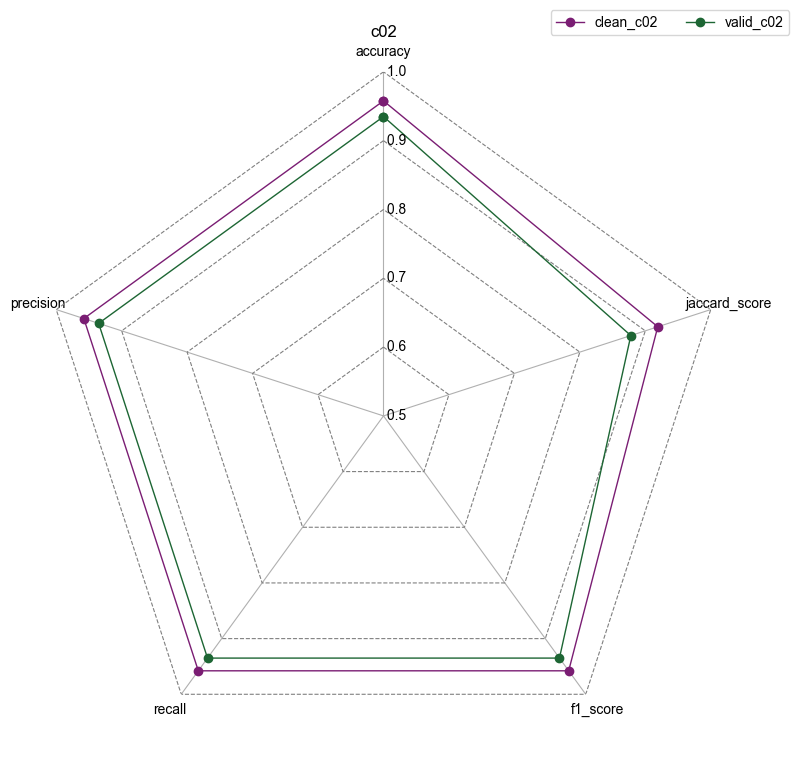

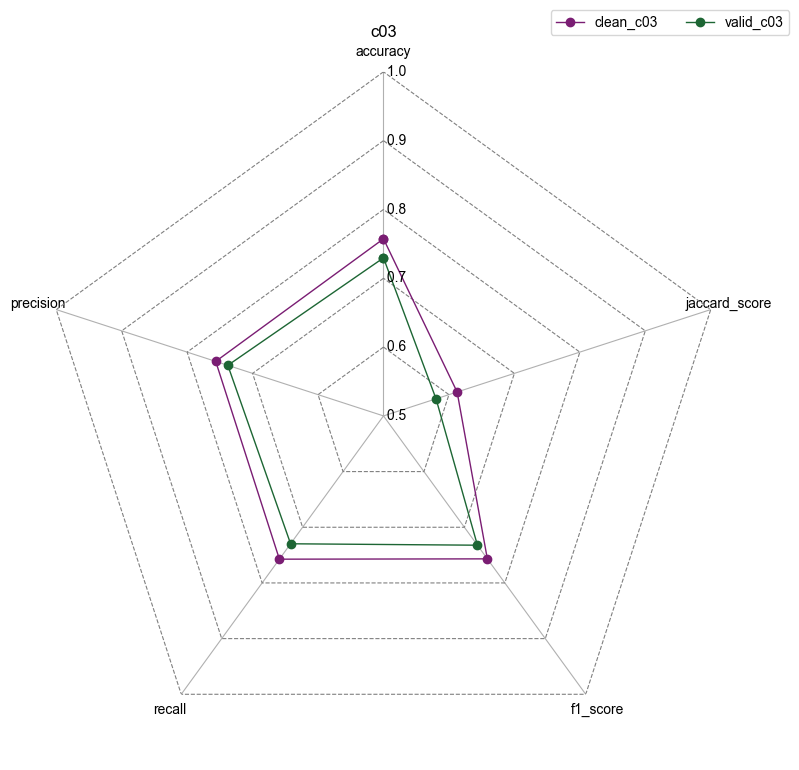

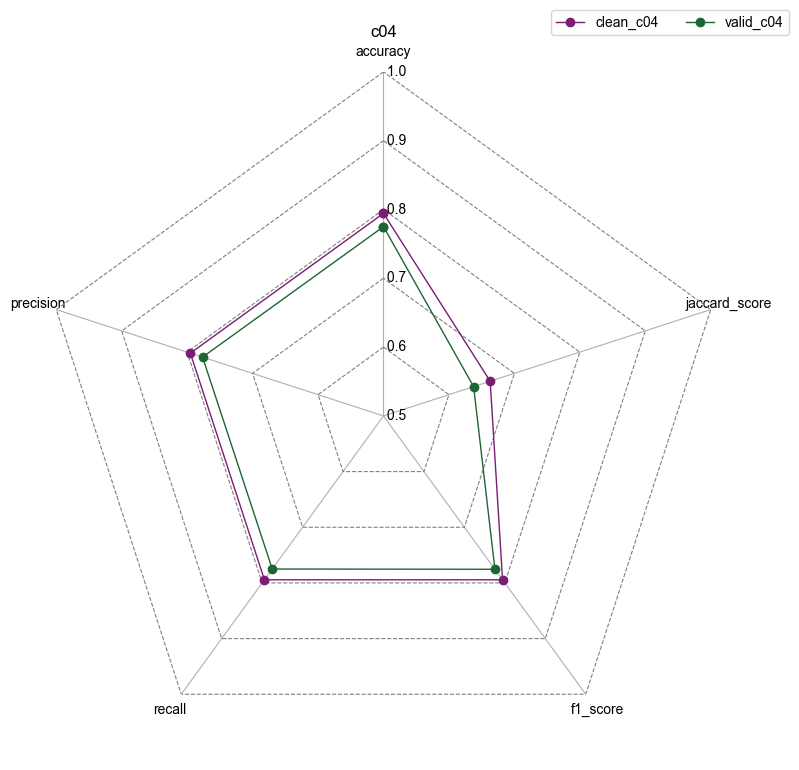

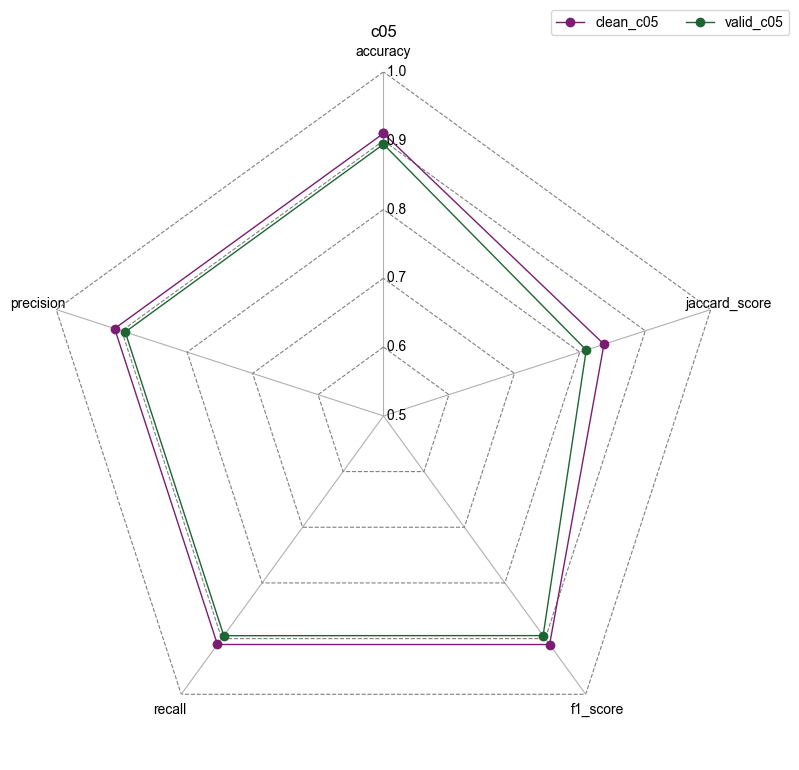

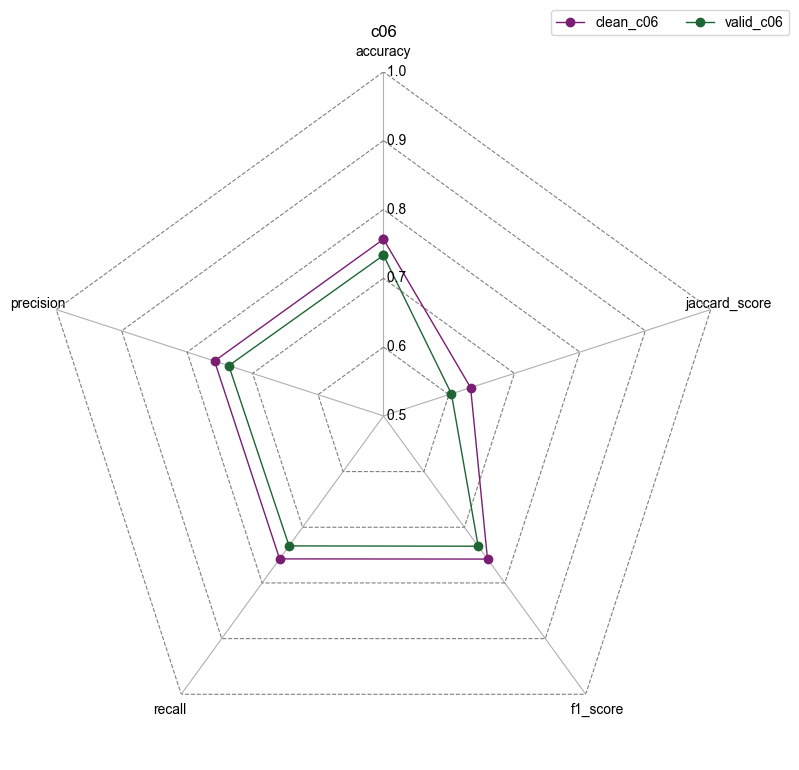

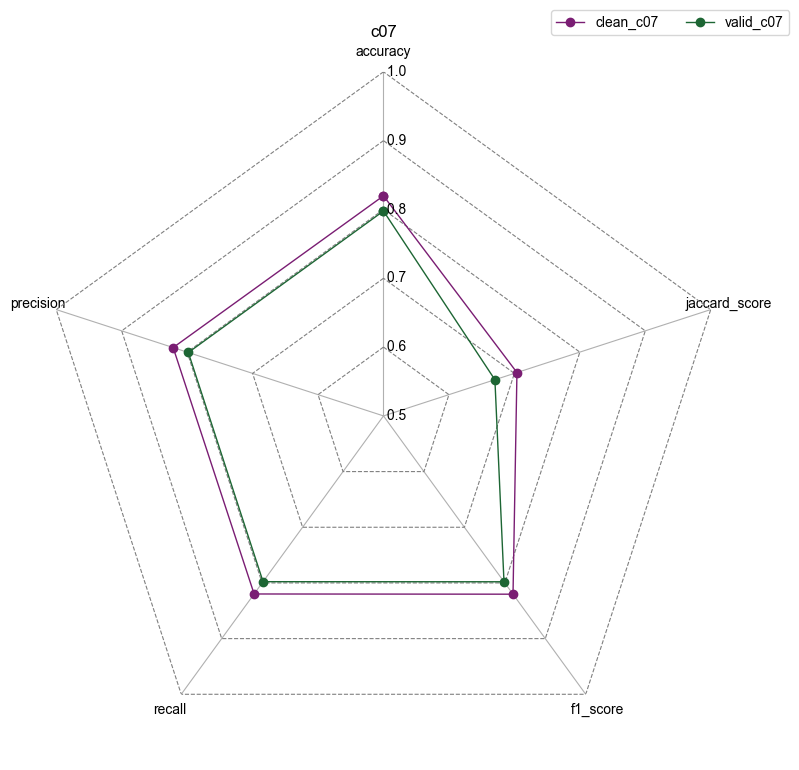

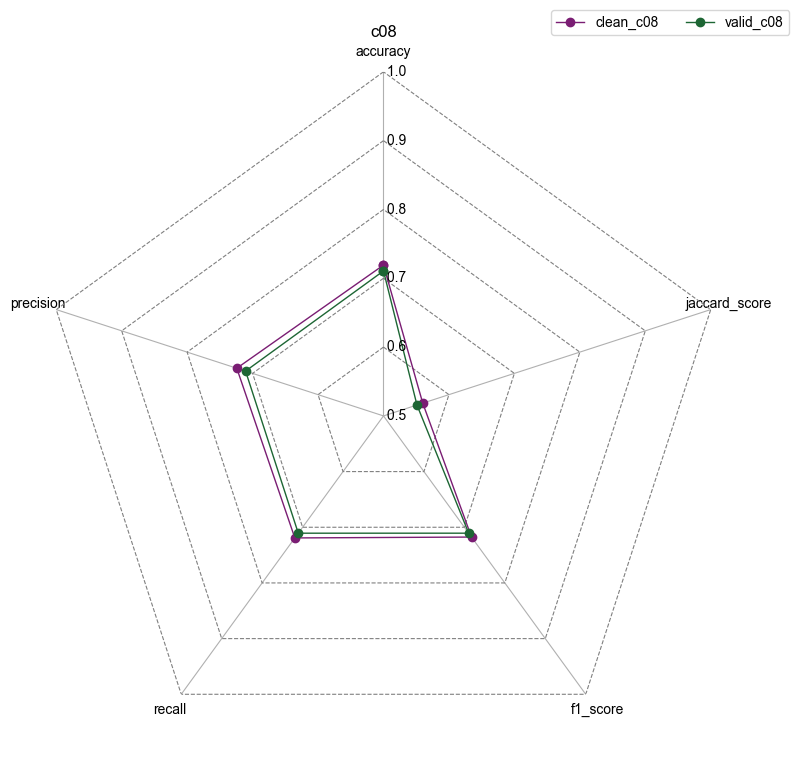

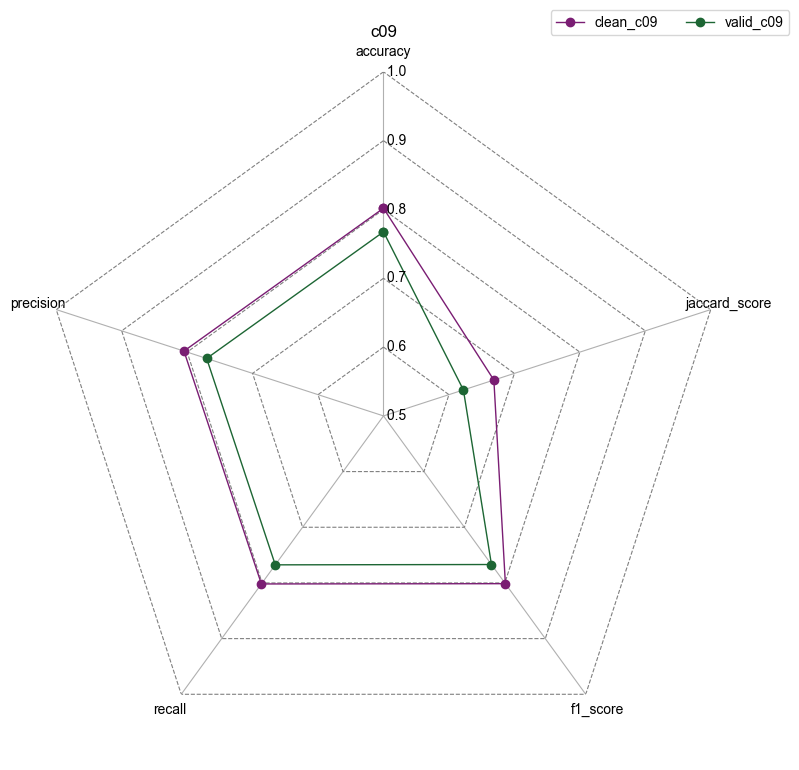

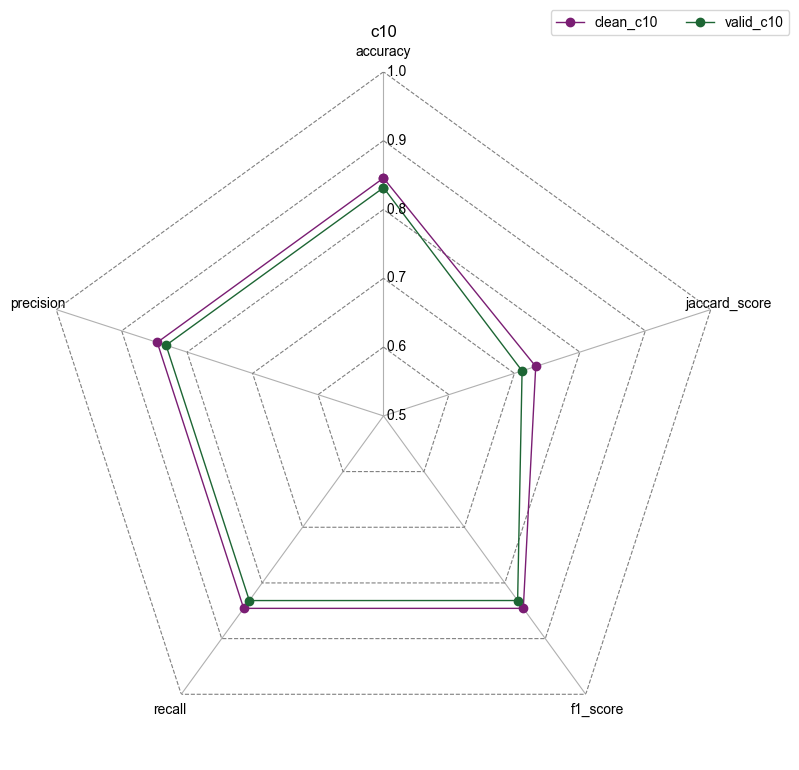

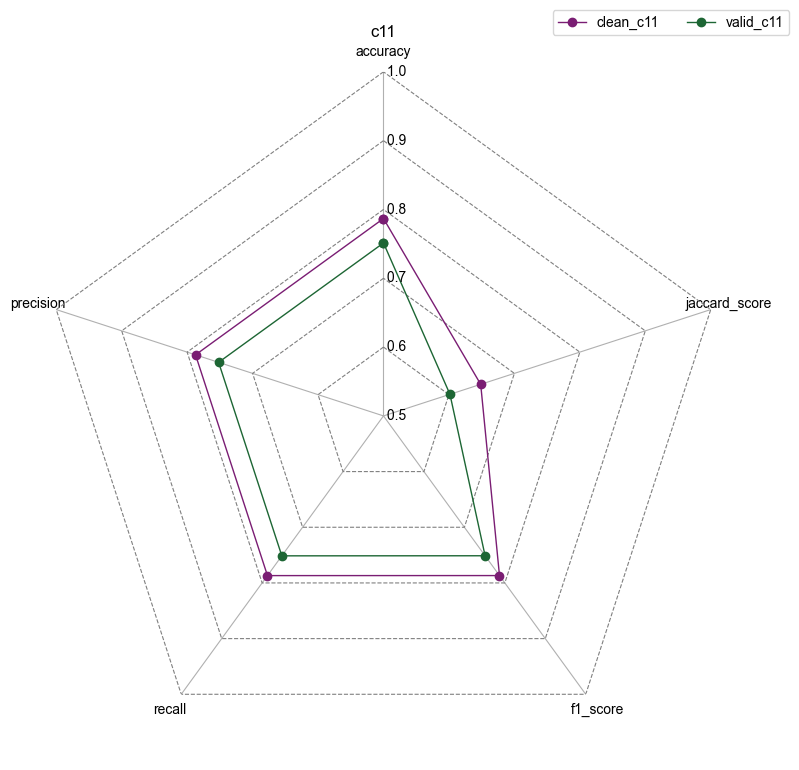

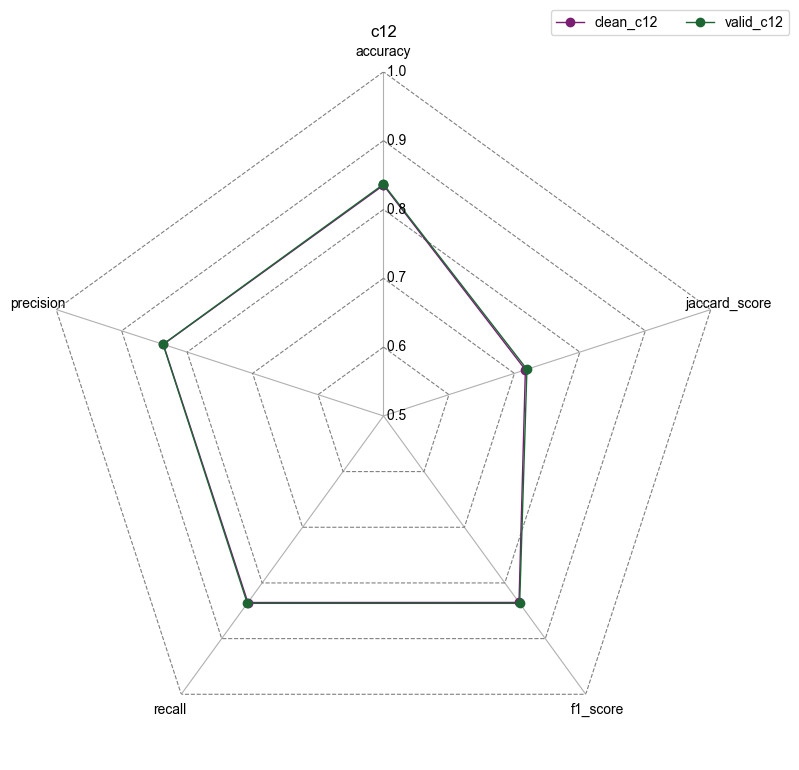

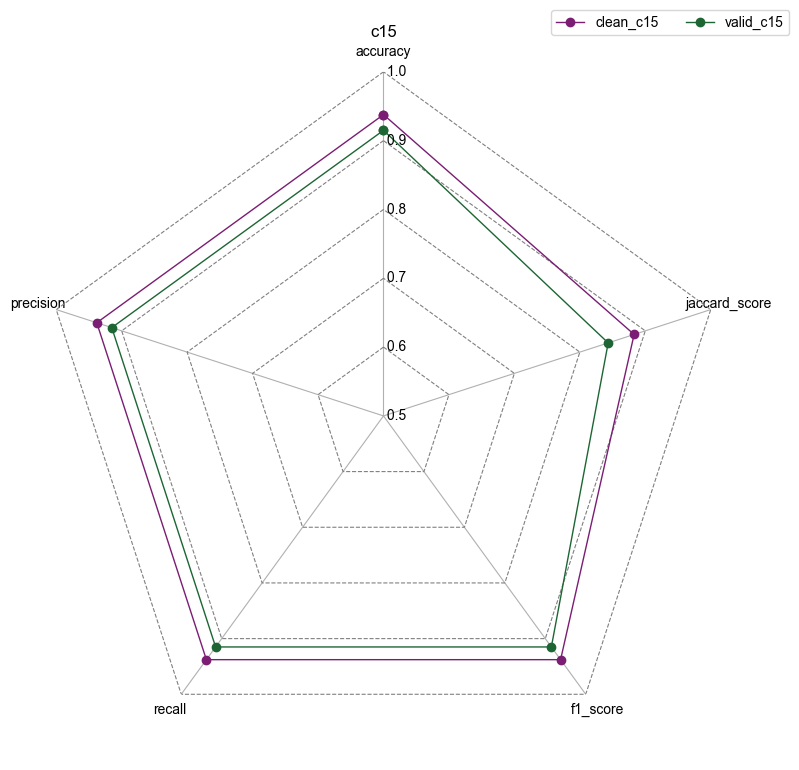

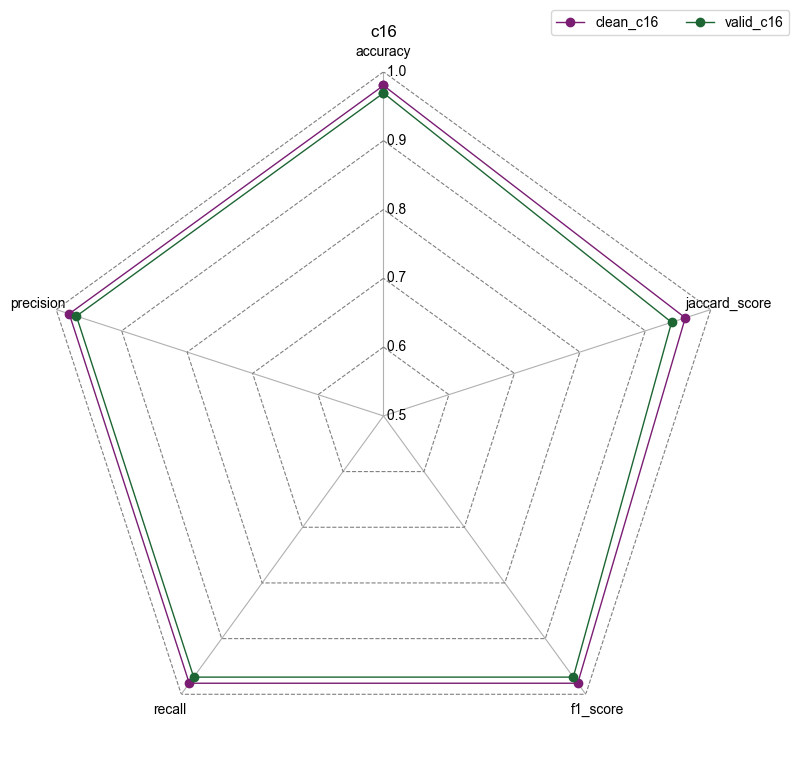

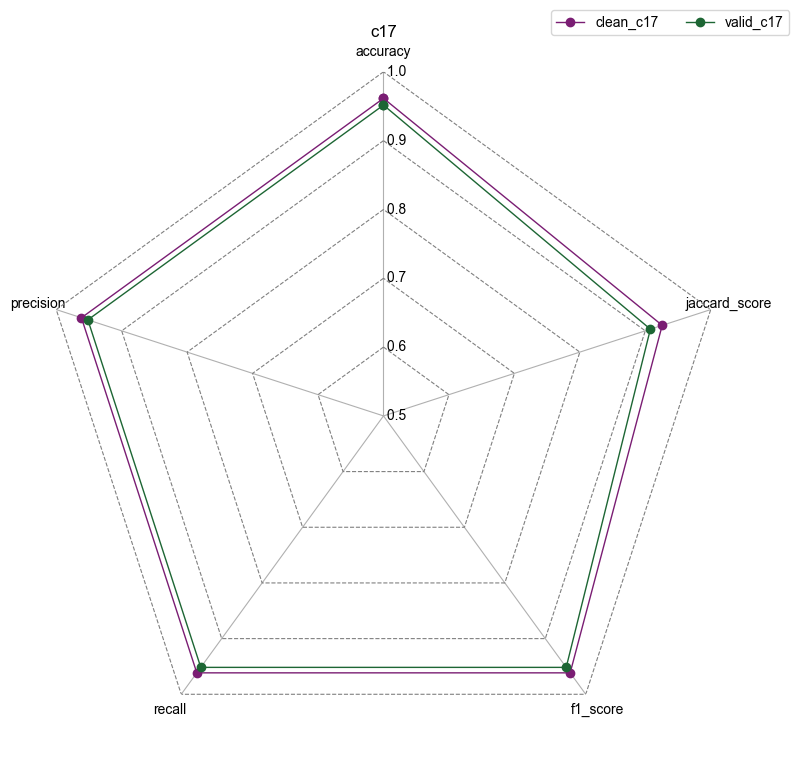

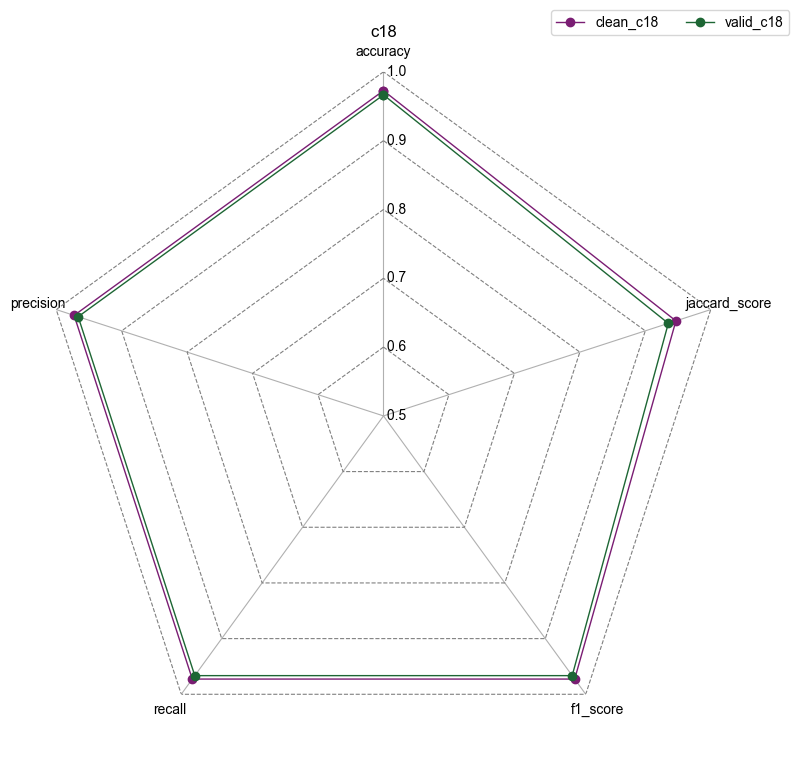

In [31]:
for target_task in tasks:
    index_bool = [f'_{target_task}' in i for i in metrics_df.index]
    y_min = ((metrics_df.loc[index_bool,:].min().min() // 0.05) * 5) / 100
    y_max = min(((metrics_df.loc[index_bool,:].max().max() // 0.05) * 5 + 5) / 100, 1.0)
    y_min = 0.5
    y_max = 1.0
    npsc.draw_radar_plot(metrics_df.loc[index_bool,:], y_min=y_min, y_max=y_max, 
                         colors=[
                             '#7A1D73FF', 
                             '#1D6634FF',
                         ]
                        )
    plt.title(target_task)